#  Digits Classification using Feed Forward Neural Network

#### Load Digits classification dataset. Divide the data into training and testing set. Print the training and testing data. Create a Neural Network with 2 layers and 100 nodes each for the dataset and run the model for 500 iterations. Apply logistic regression, SVM, decision tree to the dataset and print the results. Print the evaluation results and learned model weights. Compare the results in terms of speed and accuracy.

### Simple example

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

#### Suppress warning messages

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Create two samples of 2 input features and one output feature

In [3]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]

#### Create Multi Layer Perceptron Neural Network

In [4]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

#### Train the neural network

In [5]:
model.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Predict class label for the input [2,2]

In [6]:
model.predict([[2., 2.]])

array([1])

#### Similarly predict class label for the input [-1,-2]

In [7]:
model.predict([[-1., -2.]])

array([0])

#### Similarly predict class label for the input [1,2]

In [8]:
model.predict([[1., 2.]])

array([1])

### Digits classification using ANN

#### Load digits dataset

In [9]:
digits = load_digits()

#### Print their shapes

In [10]:
print(digits.data.shape)

(1797, 64)


#### Print target class labels

In [11]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


#### Show the first image in the dataset

<Figure size 432x288 with 0 Axes>

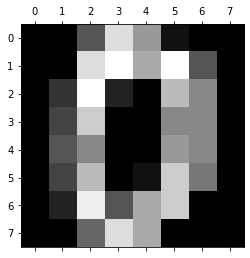

In [12]:
plt.gray()
plt.matshow(digits.images[0]) 

#### Split dataset into training set and test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.1, random_state=0)

#### Print shapes

In [14]:
print(X_train.shape)

(1617, 64)


In [15]:
print(y_train.shape)

(1617,)


In [16]:
print(X_test.shape)

(180, 64)


In [17]:
print(y_test.shape)

(180,)


#### Create MLPClassfier model

In [18]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

#### Train the model

In [19]:
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Predict labels for test data

In [20]:
y_pred = model.predict(X_test)

#### Let us compare some digit 

In [21]:
# print the class of 10 samples in test set
print(y_test[:10])

[2 8 2 6 6 7 1 9 8 5]


In [22]:
# print the corresponding class of the predicted target 
print(y_pred[:10])

[7 1 7 6 6 7 7 3 9 5]


#### Display accuracy of training set and test set

In [23]:
print(model.score(X_train, y_train))

0.5961657390228818


In [24]:
# print accuracy of test test
print(model.score(X_test, y_test))

0.5333333333333333


#### Show MSE value and precision and recall

In [25]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: %.3f' %mse)

Mean Squared Error: 12.078


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.17      0.05      0.08        20
           2       0.12      0.06      0.08        16
           3       0.30      0.70      0.42        10
           4       0.90      0.90      0.90        10
           5       0.73      0.52      0.61        21
           6       0.96      0.92      0.94        25
           7       0.46      0.85      0.60        20
           8       0.39      0.39      0.39        23
           9       0.50      0.29      0.37        24

    accuracy                           0.53       180
   macro avg       0.51      0.57      0.51       180
weighted avg       0.52      0.53      0.50       180



### Digit Classification using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#### Create standard scaler and normalize training set and test set

In [28]:
scaler = StandardScaler()
# normalize X_train
X_train_scaled = scaler.fit_transform(X_train)
#normalize X_test
X_test_scaled = scaler.fit_transform(X_test)

#### Create LogisticRegression model

In [29]:
model_lr = LogisticRegression(max_iter=500)

#### Train the model

In [30]:
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred_lr = model_lr.predict(X_test_scaled)

#### Compare some output digits

In [32]:
print(y_test[:10])

[2 8 2 6 6 7 1 9 8 5]


In [33]:
print(y_pred_lr[:10])

[2 8 2 6 6 7 1 9 8 5]


#### Print accuracy of test test

In [34]:
mse = mean_squared_error(y_test, y_pred_lr)
print('Mean Squared Error - Logistic regression: %.3f' %mse)

Mean Squared Error - Logistic regression: 1.167


In [35]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.95      0.93        20
           2       1.00      1.00      1.00        16
           3       0.91      1.00      0.95        10
           4       0.83      1.00      0.91        10
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        25
           7       0.95      0.90      0.92        20
           8       0.95      0.87      0.91        23
           9       1.00      0.92      0.96        24

   micro avg       0.96      0.96      0.96       180
   macro avg       0.95      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



### Digit Classification using Support Vector Machine

In [36]:
from sklearn.svm import LinearSVC

#### Create SVC classifier

In [37]:
model_svc = LinearSVC(C=1.0, max_iter=500)

#### Train the model

In [38]:
model_svc.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=500,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Predict target labels

In [39]:
y_pred_svc = model_svc.predict(X_test_scaled)

#### Let us compare one digit

In [40]:
print(y_test[:1])

[2]


In [41]:
print(y_pred_svc[:1])

[2]


#### Show error values

In [42]:
mse = mean_squared_error(y_test, y_pred_svc)
print('Mean Squared Error - SVC: %.3f' %mse)

Mean Squared Error - SVC: 1.178


In [43]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      0.95      0.90        20
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       0.95      0.95      0.95        21
           6       0.92      0.96      0.94        25
           7       0.95      0.90      0.92        20
           8       0.95      0.87      0.91        23
           9       0.96      0.92      0.94        24

   micro avg       0.94      0.94      0.94       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.95      0.94      0.94       180



### Digit Classification using Decision Trees

In [44]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

#### Create the classifier

In [45]:
model_dt = DecisionTreeClassifier()

#### Train the model and predict test data

In [46]:
model_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
y_pred_dt = model_dt.predict(X_test_scaled)

#### Print error values and classification report

In [48]:
mse = mean_squared_error(y_test, y_pred_dt)
print('Mean Squared Error - Decision Tree: %.3f' %mse)

Mean Squared Error - Decision Tree: 3.100


In [49]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.89      0.85      0.87        20
           2       0.92      0.75      0.83        16
           3       0.69      0.90      0.78        10
           4       0.75      0.90      0.82        10
           5       1.00      0.81      0.89        21
           6       0.88      0.92      0.90        25
           7       0.86      0.90      0.88        20
           8       0.79      0.83      0.81        23
           9       0.95      0.83      0.89        24

   micro avg       0.86      0.86      0.86       180
   macro avg       0.85      0.87      0.86       180
weighted avg       0.87      0.86      0.86       180



### Extra Credits

##### 1. Tabulate MSE, Average precision, Average recall, Average F1 score values for MLPClassifier, LogisticRegression, LinearSVC and DecisionTreeClassifier

##### 2. Which of the four classifiers performs best for Digits dataset?

##### 3. Compare performance of all these classifiers with ROC-AUC curve